In [20]:
# general imports 
import os
import vis_functions as nave
import pandas as pd
import numpy as np

In [4]:
input_path = "C:\\Users\\nicsw\\Documents\\Nave_Projects\\retro_creating_pdfs\\granules\\76734698-59b1-463e-929f-d1e5a98d5b2a"


In [6]:
granule = nave.create_granule_dict(input_path)

In [9]:
granule['twr1_block']

<xarray.Dataset>
Dimensions:         (time: 188, lat: 3, lon: 3)
Coordinates:
  * time            (time) datetime64[ns] 2023-11-01 2023-11-02 ... 2024-05-06
  * lat             (lat) float64 19.9 19.89 19.89
  * lon             (lon) float64 -101.0 -101.0 -101.0
Data variables:
    KC              (time, lat, lon) float32 ...
    LAI             (time, lat, lon) float32 ...
    AWL             (time, lat, lon) float32 ...
    ETA_est_mm_day  (time, lat, lon) float32 ...
    ETA_sgm_mm_day  (time, lat, lon) float32 ...
    irrigtn_mm_d    (time, lat, lon) float32 ...
    Fr_Cover        (time, lat, lon) float32 ...
Attributes:
    Forecast_transit_date:      2024-04-28
    uid:                        76734698-59b1-463e-929f-d1e5a98d5b2a
    aoi:                        POLYGON ((-101.03525554413154 19.895824324665...
    crop:                       soybean
    Curent_et_mm_day:           0.84997773
    Current_et_risk_category:   0
    Forecast_et_mm_day:         0.7440531
    Forecast_et_risk_category:  0
    Crop_type:                  soybean
    field_uid:                  76734698-59b1-463e-929f-d1e5a98d5b2a
    NPV:                        NAVE-TOP_V1.3

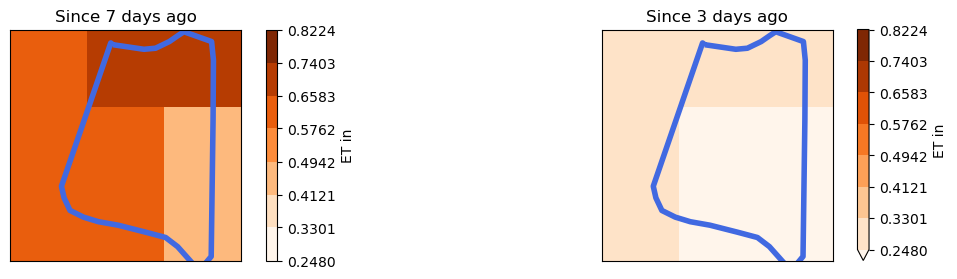

In [15]:
dataset_start = pd.Timestamp("2023-12-01")


nave.build_evapotranspiration_map(dataset_start, granule['twr1_block'], "steam.pdf")

In [18]:
def build_evapotranspiration_map(twr_block, output):
    """
    Generates a map visualization of evapotranspiration (ET) for the past 3 and 
    7 days, using data from the provided dataset. Results are displayed in 
    imperial units (inches).

    :param twr_block: Dataset containing evapotranspiration data (`ETA_est_mm_day`) 
                      and the area of interest (AOI) geometry.
    :type twr_block: xarray.Dataset
    :param output: File path where the generated PDF page will be saved.
    :type output: str
    :return: None
    """
    forecast_date = pd.to_datetime(twr_block.attrs['Forecast_transit_date'])
    up_to_date = forecast_date- pd.Timedelta('1 days') 

    # for eye candy
    past_3d = up_to_date - pd.timedelta_range(start='1 day', periods=3) 
    past_7d = up_to_date - pd.timedelta_range(start='1 day', periods=7) 

    eta_3d_da = twr_block.ETA_est_mm_day.sel(time = past_3d)
    eta_7d_da = twr_block.ETA_est_mm_day.sel(time = past_7d)

    eta_3d_da_cs = eta_3d_da.sum(dim='time')
    eta_7d_da_cs = eta_7d_da.sum(dim='time')
    etlabel ="ET mm"

    eta_3d_da_cs = eta_3d_da.sum(dim='time')/25.4 # Imperial Units
    eta_7d_da_cs = eta_7d_da.sum(dim='time')/25.4 # Imperial Units
    eta_cm_da_cs = np.concatenate((eta_3d_da_cs, eta_7d_da_cs))
    etlabel ="ET in"

    # Prepare the figure
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))
    # Color levels
    levels_3day = np.array([(i+1)/8.0 for i in range(8)])*(np.nanmax(eta_3d_da_cs)+0.1- np.nanmin(eta_3d_da_cs))+np.nanmin(eta_3d_da_cs)
    levels_7day = np.array([(i+1)/8.0 for i in range(8)])*(np.nanmax(eta_7d_da_cs)+0.1- np.nanmin(eta_7d_da_cs))+np.nanmin(eta_7d_da_cs)
    levels_cmbn = np.array([(i+1)/8.0 for i in range(8)])*(np.nanmax(eta_cm_da_cs)+0.1- np.nanmin(eta_cm_da_cs))+np.nanmin(eta_cm_da_cs)

    # Plot data
    levels = levels_cmbn.tolist()
    eta_7d_da_cs.plot(ax=ax1, cmap='Oranges', levels=levels, cbar_kwargs={"label": etlabel, "ticks": levels, "spacing": "proportional"})

    levels = levels_cmbn.tolist()
    eta_3d_da_cs.plot(ax=ax2, cmap='Oranges', levels=levels, cbar_kwargs={"label": etlabel, "ticks": levels, "spacing": "proportional"})
    geom = shapely.wkt.loads(twr_block.aoi)
    g = gpd.GeoSeries([geom])
    g.plot(ax=ax1, facecolor='none', edgecolor='royalblue',linewidth=4)
    g.plot(ax=ax2, facecolor='none', edgecolor='royalblue',linewidth=4)


    ax1.title.set_text("Since 7 days ago")
    ax2.title.set_text("Since 3 days ago")
    ax1.xaxis.set_major_locator(ticker.NullLocator())
    ax1.yaxis.set_major_locator(ticker.NullLocator())
    ax2.xaxis.set_major_locator(ticker.NullLocator())
    ax2.yaxis.set_major_locator(ticker.NullLocator())
    ax1.set(xlabel=None)
    ax1.set(ylabel=None)
    ax2.set(xlabel=None)
    ax2.set(ylabel=None)
    # Show plots,
    #plt.tight_layout()
    plt.savefig(output)

In [21]:
build_evapotranspiration_map(granule['twr1_block'], "steam.pdf")

NameError: name 'plt' is not defined